In [ ]:
import pandas as pd 
titanic_original = pd.read_csv("data/titanic/train.csv", sep=',')
titanic_train = pd.read_csv("data/titanic/train.csv", sep=',')
titanic_test = pd.read_csv("data/titanic/test.csv", sep=',')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("Taille du dataset d'entrainement : ",titanic_train.shape)
print("Taille du dataset de test : ",titanic_test.shape)

Taille du dataset d'entrainement :  (891, 12)
Taille du dataset de test :  (418, 11)


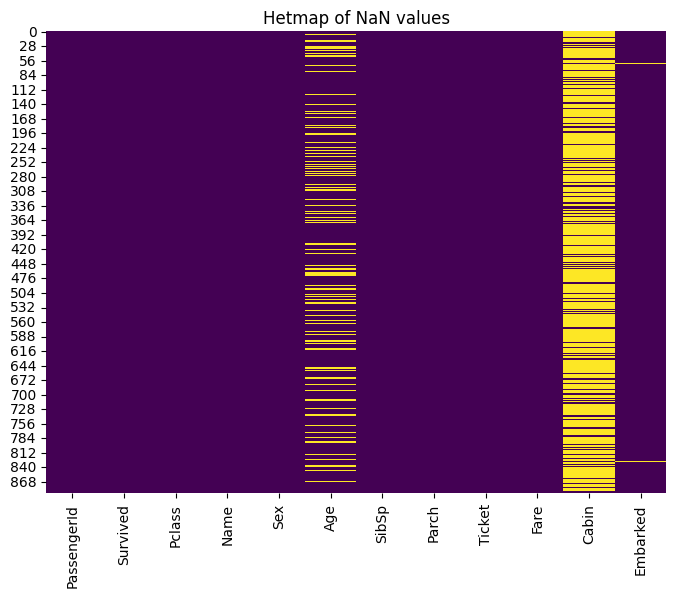

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(titanic_train.isnull(), cbar=False, cmap='viridis')
plt.title('Hetamap of NaN values')

plt.savefig("img/heatmap.png")
plt.show()

In [9]:
percentage_nan = titanic_train['Age'].isnull().mean() * 100
print(f"Le pourcentage de valeurs NaN dans la colonne 'age' est de {percentage_nan:.2f}%")

Le pourcentage de valeurs NaN dans la colonne 'age' est de 19.87%


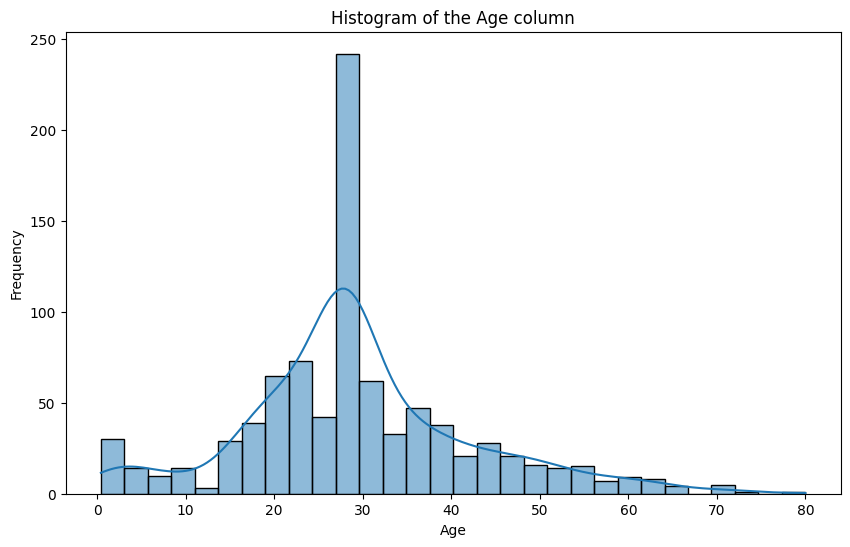

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_train, x='Age', kde=True)
plt.title('Histogram of the Age column')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.savefig('img/age_histogram.png')
plt.show()

In [14]:
print(f"La médiane de la colonne Age est : {titanic_train['Age'].mean():.1f}")
print(f"La moyenne de la colonne Age est : {titanic_train['Age'].median():.1f}")

percentage_nan_cabin = titanic_train['Cabin'].isnull().mean() * 100
print(f"Le pourcentage de valeurs NaN dans la colonne 'Cabin' est de {percentage_nan_cabin:.2f}%")

La médiane de la colonne Age est : 29.7
La moyenne de la colonne Age est : 28.0
Le pourcentage de valeurs NaN dans la colonne 'Cabin' est de 77.10%


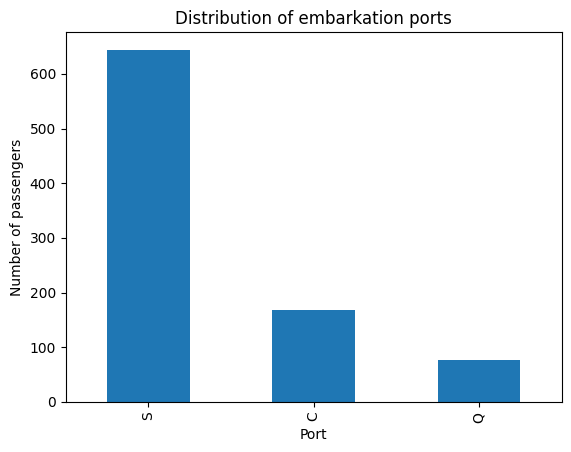

In [15]:
titanic_train['Embarked'].value_counts().plot(kind='bar')
plt.title('Distribution of embarkation ports')
plt.xlabel('Port')
plt.ylabel('Number of passengers')
plt.savefig("img/PortEmbarkations.png")
plt.show()

In [16]:
titanic_train['Age'].fillna(28, inplace=True)
titanic_train['Embarked'].fillna('S', inplace=True)
# titanic_train.drop(columns=['Cabin'], inplace=True)
missing_values = titanic_train.isnull().sum()
print("Valeurs manquantes après prétraitement :")
print(missing_values)

print("\nAperçu du DataFrame après prétraitement :")
print(titanic_train.head())

print("\nDistribution de 'Embarked' :")
print(titanic_train['Embarked'].value_counts())

print("\nStatistiques de 'Age' :")
print(titanic_train['Age'].describe())

Valeurs manquantes après prétraitement :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Aperçu du DataFrame après prétraitement :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0

C:\Users\randy\AppData\Local\Temp\ipykernel_32136\79971280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train['Age'].fillna(28, inplace=True)
C:\Users\randy\AppData\Local\Temp\ipykernel_32136\79971280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

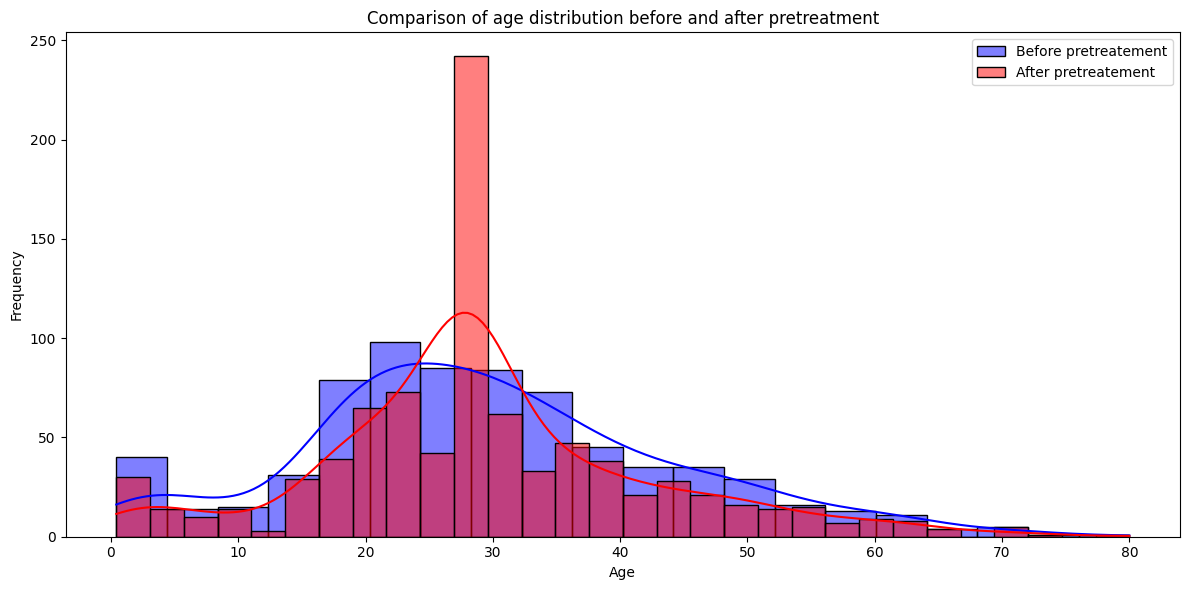

In [19]:
plt.figure(figsize=(12, 6))

sns.histplot(data=titanic_original, x='Age', kde=True, color='blue', alpha=0.5, label='Before pretreatement')
sns.histplot(data=titanic_train, x='Age', kde=True, color='red', alpha=0.5, label='After pretreatement')

plt.title('Comparison of age distribution before and after pretreatment')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.savefig("img/BeforeAfterCombine.png")
plt.show()